**Dans quelles mesures l'origine sociale est un déterminant du choix des langues au collège ?**

*Julia Nicolas, Théophile Froment*


Nous étudions les collèges qui existent depuis 2005 et sont encore existants en 2018. L'objectif de ce travail est de s'intéresser au choix de la langue vivante en quatrième. La question est de savoir : Dans quelles mesures l'origine sociale est un déterminant du choix des langues au collège ? 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import des bases élèves

In [3]:
elev05 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev05.csv", delimiter=",")  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
elev06 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev06.csv", delimiter=",")  
elev07 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev07.csv", delimiter=",")  
elev08 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev08.csv", delimiter=",") 
elev09 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev09.csv", delimiter=",")  
elev10 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev10.csv", delimiter=",")  
elev11 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev11.csv", delimiter=",")  
elev12 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev12.csv", delimiter=",")  
elev13 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev13.csv", delimiter=",")  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
elev14 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev14.csv", delimiter=",")  
elev15 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev15.csv", delimiter=",")  
elev16 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev16.csv", delimiter=",")  
elev17 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev17.csv", delimiter=",")  
elev18 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/elevs/elev18.csv", delimiter=",")  

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11,21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Import des bases etab

In [6]:
etab05 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab05.csv", delimiter=",")  
etab06 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab06.csv", delimiter=",")  
etab07 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab07.csv", delimiter=",")  
etab08 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab08.csv", delimiter=",")  
etab09 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab09.csv", delimiter=",")  
etab10 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab10.csv", delimiter=",")  
etab11 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab11.csv", delimiter=",")  
etab12 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab12.csv", delimiter=",")  
etab13 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab13.csv", delimiter=",")  
etab14 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab14.csv", delimiter=",")  
etab15 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab15.csv", delimiter=",")  
etab16 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab16.csv", delimiter=",")  
etab17 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab17.csv", delimiter=",")  
etab18 = pd.read_csv("/content/drive/MyDrive/PDSS/communsannees/etabs/etab18.csv", delimiter=",") 

# Sur l'ensemble des années, quelle représentation dans les langues en île de france ? 

In [7]:
elevs_tot = pd.concat([elev05,elev06,elev07,elev08,elev09,elev10,elev11,elev12,elev13,elev14,elev15,elev16,elev17,elev18],ignore_index = True)

In [8]:
lv2_csp_tot = {}
for lv2 in list(elevs_tot['LV2'].unique()) :
  df = elevs_tot[elevs_tot['LV2'] == lv2]
  L = list(df['csp+?'])
  lv2_csp_tot[lv2] = sum(L)/len(L)

In [9]:
colonnecsp = list(elevs_tot['csp+?'])

In [10]:
taux_csp_total = sum(colonnecsp) / len(colonnecsp)

In [11]:
taux_csp_total

0.4588128798933096

In [12]:
lv2_csp_tot

{'ALBANAIS': 1.0,
 'ALLEMAND': 0.5552816114118161,
 'ANGLAIS': 0.5815669705326939,
 'ARABE': 0.18983700862895495,
 'ARMENIEN': 0.5958005249343832,
 'AUVERGNAT': 0.14285714285714285,
 'CHINOIS': 0.6207523915722754,
 'COREEN': 0.46601941747572817,
 'ESPAGNOL': 0.42393334646265984,
 'FINNOIS': 0.0,
 'GALLO': 0.12162162162162163,
 'GREC': 1.0,
 'HEBREU': 0.6770199027340716,
 'ITALIEN': 0.48209157060982677,
 'JAPONAIS': 0.7387033398821218,
 'MELANESIEN': 0.125,
 'ML.PAICI': 0.17647058823529413,
 'OPT380': 0.22275258552108193,
 'OPT397': 0.35990888382687924,
 'PERSAN': 1.0,
 'POLONAIS': 0.2222222222222222,
 'PORTUGAIS': 0.27858593621342703,
 'PROVENCAL': 0.48484848484848486,
 'RUSSE': 0.8113827070412258,
 'SUEDOIS': 1.0,
 'TURC': 1.0,
 'VIETNAMIEN': 0.8603351955307262}

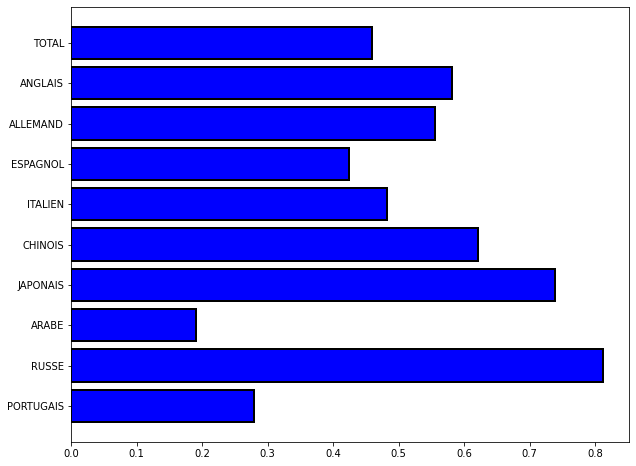

In [13]:
fig = plt.figure(1, figsize=(10, 8))
Categories = list(reversed(["TOTAL","ANGLAIS","ALLEMAND","ESPAGNOL","ITALIEN","CHINOIS","JAPONAIS","ARABE","RUSSE","PORTUGAIS"]))
taux_csp = list(reversed([taux_csp_total,lv2_csp_tot['ANGLAIS'],lv2_csp_tot['ALLEMAND'],lv2_csp_tot['ESPAGNOL'],lv2_csp_tot['ITALIEN'],lv2_csp_tot['CHINOIS'],
            lv2_csp_tot['JAPONAIS'],lv2_csp_tot['ARABE'],lv2_csp_tot['RUSSE'],lv2_csp_tot['PORTUGAIS']]))
#nb_categories = len(Categories)
#x1  = range(len(taux_csp))
plt.barh(Categories, taux_csp,color = 'blue', edgecolor = 'black', linewidth = 2)
plt.show()


In [14]:
repartition_LV1 = elevs_tot['LV1'].value_counts()

In [15]:
repartition_LV1

ANGLAIS       4275323
ALLEMAND       341255
ESPAGNOL        10742
RUSSE            7503
ITALIEN          5311
CHINOIS          3853
PORTUGAIS        3823
ARABE            2100
POLONAIS          844
JAPONAIS          499
SUEDOIS           206
NEERLAND.         204
ARMENIEN           71
VIETNAMIEN         71
DANOIS             68
NORVEGIEN          68
OPT380             18
COREEN              5
Name: LV1, dtype: int64

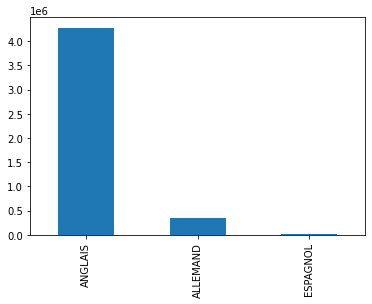

In [16]:
repartition_LV1[0:3].plot(kind = 'bar')

In [17]:
repartition_LV2 = elevs_tot['LV2'].value_counts()

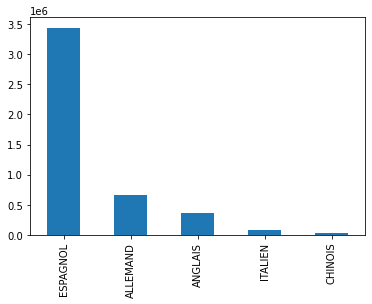

In [18]:
repartition_LV2[0:5].plot(kind = 'bar')

# CSP

## Calculons par établissement, chaque année le taux de CSP+

In [19]:
num_etabs = list(etab05['NUM_ETAB'].unique()) # Liste de l'ensemble des collèges

On concatène l'ensemble des élèves sur toutes les années, en les différenciant avec leur année d'étude.  

In [20]:
elev05['année'] = ['2005' for i in range(0,len(elev05))]
elev06['année'] = ['2006' for i in range(0,len(elev06))]
elev07['année'] = ['2007' for i in range(0,len(elev07))]
elev08['année'] = ['2008' for i in range(0,len(elev08))]
elev09['année'] = ['2009' for i in range(0,len(elev09))]
elev10['année'] = ['2010' for i in range(0,len(elev10))]
elev11['année'] = ['2011' for i in range(0,len(elev11))]
elev12['année'] = ['2012' for i in range(0,len(elev12))]
elev13['année'] = ['2013' for i in range(0,len(elev13))]
elev14['année'] = ['2014' for i in range(0,len(elev14))]
elev15['année'] = ['2015' for i in range(0,len(elev15))]
elev16['année'] = ['2016' for i in range(0,len(elev16))]
elev17['année'] = ['2017' for i in range(0,len(elev17))]
elev18['année'] = ['2018' for i in range(0,len(elev18))]

In [21]:
elev05_ = elev05[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev06_ = elev06[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev07_ = elev07[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev08_ = elev08[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev09_ = elev09[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev10_ = elev10[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev11_ = elev11[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev12_ = elev12[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev13_ = elev13[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev14_ = elev14[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev15_ = elev15[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev16_ = elev16[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev17_ = elev17[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]
elev18_ = elev18[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2']]

On regarde premièrement l'évolution du taux de CSP+ dans le collège en général. 

In [22]:
elevs_ = pd.concat([elev05_,elev06_,elev07_,elev08_,elev09_,elev10_,elev11_,elev12_,elev13_,elev14_,elev15_,elev16_,elev17_,elev18_],ignore_index = True)

In [23]:
elevscsp = elevs_[['NUM_ETAB', 'année', 'csp+?']]

In [24]:
csp_annees = {}

In [25]:
tableau = elev05_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableau)) : 
  csp_annees[tableau['NUM_ETAB'][i]] = {}
  csp_annees[tableau['NUM_ETAB'][i]]['2005'] = tableau['csp+?'][i]

In [26]:
tableaubis = elev06_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2006'] = tableaubis['csp+?'][i]

tableaubis = elev07_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2007'] = tableaubis['csp+?'][i]

tableaubis = elev08_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2008'] = tableaubis['csp+?'][i]

tableaubis = elev09_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2009'] = tableaubis['csp+?'][i]

tableaubis = elev10_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2010'] = tableaubis['csp+?'][i]

tableaubis = elev11_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2011'] = tableaubis['csp+?'][i]

tableaubis = elev12_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2012'] = tableaubis['csp+?'][i]

tableaubis = elev13_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2013'] = tableaubis['csp+?'][i]

tableaubis = elev14_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2014'] = tableaubis['csp+?'][i]

tableaubis = elev15_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2015'] = tableaubis['csp+?'][i]

tableaubis = elev16_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2016'] = tableaubis['csp+?'][i]

tableaubis = elev17_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2017'] = tableaubis['csp+?'][i]

tableaubis = elev18_.groupby(by= ["NUM_ETAB"]).mean().reset_index()
for i in range(0,len(tableaubis)) : 
  csp_annees[tableaubis['NUM_ETAB'][i]]['2018'] = tableaubis['csp+?'][i]


On obtient le dictionnaire suivant : pour chaque établissement, on a le taux de CSP+ dans l'établissement chaque année. 

In [27]:
csp_annees['0752906B'] # Évolution du taux de CSP+ dans les différents établissements

{'2005': 0.868421052631579,
 '2006': 0.8551724137931035,
 '2007': 0.8741258741258742,
 '2008': 0.8888888888888888,
 '2009': 0.8963210702341137,
 '2010': 0.8798701298701299,
 '2011': 0.8262295081967214,
 '2012': 0.79,
 '2013': 0.8271186440677966,
 '2014': 0.8178694158075601,
 '2015': 0.8074324324324325,
 '2016': 0.7973856209150327,
 '2017': 0.8225108225108225,
 '2018': 0.8599137931034483}

Plusieurs types de dynamiques semblent exister : on va se placer dans les collèges où le taux de CSP+ n'a pas beaucoup évolué au long des années, dans le but de regarder l'évolution dans les différentes LV2. 

In [28]:
# Si on prend les élèves qui ont exclusivement allemand / espagnol

L = ['ESPAGNOL','ALLEMAND']
elevs_['sel'] = elevs_['LV2'].apply(lambda x : 1 if x in L else 0)

In [29]:
elevs_ = elevs_[elevs_['sel'] == 1]

In [30]:
len(elevs_) # Plus de 4 millions de lignes "élève" en tout.

4103994

NB : Attention aux doublons.

Chaque année, on retrouve sûrement en grande partie les élèves de l'année précédente qui n'ont pas changé de collège mais nous n'avons pas d'identifiant pour pouvoir les repérer et affiner notre analyse. Cependant, nos données allant de 2005 à 2018, il y a assez d'années pour pouvoir considérer que les lignes élèves sont suffisamment des personnes différentes.

On va regarder maintenant l'évolution des CSP+ mais cette fois-ci dans les langues. 
On va prendre par exemple les collèges où le taux de CSP+ en général n'a pas trop évolué sur la période considérée et regarder si le taux de CSP+ dans les LV2 allemand et espagnol a lui davantage évolué. 

In [31]:
# Petit programme annexe : plus grand écart dans une liste 
def pgecart(L) :
  L2 = sorted(L)
  e = L2[len(L)-1] - L[0]
  return e

In [32]:
ecarts_csp = {}
for etab in list(csp_annees.keys()) : 
  dico = csp_annees[etab]
  values = list(dico.values())
  ecarts_csp[etab] = pgecart(values)

In [33]:
# Moyenne du plus grand écart de CSP au sein des collèges 
ecartmoyen = sum(list(ecarts_csp.values()))/len(list(ecarts_csp.values())) 

In [34]:
# On prend les collèges où le plus gros écart de taux de CSP+ entre les années est en dessous de la moyenne des collèges. 
constants = {}
for etab in list(ecarts_csp.keys()) :
  if ecarts_csp[etab] < ecartmoyen : 
    constants[etab] = csp_annees[etab]
# ceux qui sont plutôt constants

Dans ces établissements, on regarde maintenant les évolutions de CSP en espagnol, allemand

In [35]:
elevs_['LV2'].unique()

array(['ESPAGNOL', 'ALLEMAND'], dtype=object)

In [36]:
del(elevs_['sel'])

In [37]:
elevs_['sel2'] = elevs_['NUM_ETAB'].apply(lambda x : 1 if x in list(constants.keys()) else 0)

In [38]:
elevs_ = elevs_[elevs_['sel2'] == 1]

In [39]:
# On sélectionne les établissements avec des élèves qui font à la fois allemand et espagnol 

selection = []
for etab in list(constants.keys()) :
  df = elevs_[elevs_['NUM_ETAB'] == etab] 
  langues = list(df['LV2'].unique())
  if len(langues) == 2 :
    selection.append(etab)

In [40]:
# Pour chaque établissement qui remplit les critères précédents, 
#on prend les élèves de cet établissements, et pour chaque LV2 on regarde le taux de CSP dans la LV2 

csp_langues = {}

for etab in selection :
  df = elevs_[elevs_['NUM_ETAB'] == etab]
  df2 = df.groupby(['année', 'LV2']).mean().reset_index()
  dico = {}
  dfa = df2[df2['LV2'] == 'ALLEMAND'].reset_index()
  dfe = df2[df2['LV2'] == 'ESPAGNOL'].reset_index()
  dicoa = {}
  dicoe = {}
  for i in range(0,len(dfa)) :
    dicoa[dfa['année'][i]] = dfa['csp+?'][i]
  for j in range(0,len(dfe)) :
    dicoe[dfe['année'][j]] = dfe['csp+?'][j]
  dico['ALLEMAND'] = dicoa
  dico['ESPAGNOL'] = dicoe
  csp_langues[etab] = dico

On obtient alors le dictionnaire suivant : pour chaque établissement, on suit l'évolution du taux de CSP+ dans chacune des LV2 allemand et espagnol au cours des années. Nous allons comparer cette évolution avec l'évolution globale du taux de CSP+ dans chaque collège. 

In [41]:
len(csp_langues)

654

In [42]:
# On rajoute le total 
for etab in csp_langues.keys() :
  csp_langues[etab]["total"] = csp_annees[etab]

In [43]:
csp_langues

{'0750182R': {'ALLEMAND': {'2005': 0.7727272727272727,
   '2006': 0.7380952380952381,
   '2007': 0.5333333333333333,
   '2008': 0.4888888888888889,
   '2009': 0.5853658536585366,
   '2010': 0.6976744186046512,
   '2011': 0.8222222222222222,
   '2012': 0.76,
   '2013': 0.5925925925925926,
   '2014': 0.49056603773584906,
   '2015': 0.5471698113207547,
   '2016': 0.5909090909090909,
   '2017': 0.6086956521739131,
   '2018': 0.7083333333333334},
  'ESPAGNOL': {'2005': 0.5714285714285714,
   '2006': 0.6185567010309279,
   '2007': 0.6138613861386139,
   '2008': 0.6354166666666666,
   '2009': 0.6190476190476191,
   '2010': 0.5523809523809524,
   '2011': 0.5855855855855856,
   '2012': 0.5948275862068966,
   '2013': 0.5630252100840336,
   '2014': 0.5,
   '2015': 0.6066666666666667,
   '2016': 0.5763358778625954,
   '2017': 0.528957528957529,
   '2018': 0.596958174904943},
  'total': {'2005': 0.6308724832214765,
   '2006': 0.6546762589928058,
   '2007': 0.589041095890411,
   '2008': 0.5886524822

Calcul du plus grand écart en terme de différence de taux de CSP+ dans chaque langue

In [45]:
ecarts_csp_langues = {}
for etab in list(csp_langues.keys()) : 
  dico = csp_langues[etab]
  ecarts_csp_langues[etab] = {}
  for langue in dico.keys() :
    annees = list(dico[langue].keys())
    values = list(dico[langue].values())
    ecarts_csp_langues[etab][langue] = pgecart(values)

In [46]:
ecarts_csp_langues 

{'0750182R': {'ALLEMAND': 0.04949494949494948,
  'ESPAGNOL': 0.06398809523809523,
  'total': 0.023803775771329305},
 '0750444A': {'ALLEMAND': 0.0,
  'ESPAGNOL': 0.06947453954496208,
  'total': 0.04634643447219566},
 '0750445B': {'ALLEMAND': 0.30765580512496044,
  'ESPAGNOL': 0.0,
  'total': 0.044714843943216065},
 '0750484U': {'ALLEMAND': 0.0,
  'ESPAGNOL': 0.02031368102796674,
  'total': 0.02031368102796674},
 '0750525N': {'ALLEMAND': 0.32266666666666666,
  'ESPAGNOL': 0.014536644457904258,
  'total': 0.04271235521235517},
 '0750575T': {'ALLEMAND': 0.26564156945917283,
  'ESPAGNOL': 0.023937323790934717,
  'total': 0.04968712057532454},
 '0750610F': {'ALLEMAND': 0.1891304347826086,
  'ESPAGNOL': 0.0,
  'total': 0.010251033840060597},
 '0750611G': {'ALLEMAND': 0.0, 'ESPAGNOL': 0.0, 'total': 0.005639097744360888},
 '0751563S': {'ALLEMAND': 0.24055158324821246,
  'ESPAGNOL': 0.0531385708645874,
  'total': 0.0040457014422176085},
 '0751705W': {'ALLEMAND': 0.0,
  'ESPAGNOL': 0.023675006725

In [47]:
# On rajoute le total 
for etab in ecarts_csp_langues.keys() :
  ecarts_csp_langues[etab]["total"] = ecarts_csp[etab]

On peut visualiser ici le plus grand écart en terme de taux de CSP+ au cours des années. 

# Visualisation des évolutions des taux de CSP

Visualisation des résultats des évolutions de CSP dans les langues / au total

In [49]:
# Visualisation pour le premier établissement par exemple 

etab = '0951992Z'

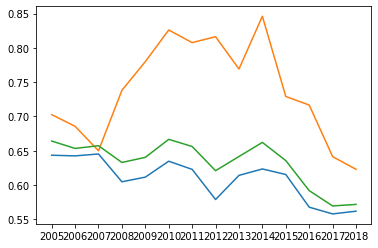

In [50]:
plt.figure(2)
x = np.array(list(csp_langues[etab]['ESPAGNOL'].keys()))
y_esp = np.array(list(csp_langues[etab]['ESPAGNOL'].values()))
y_all = np.array(list(csp_langues[etab]['ALLEMAND'].values()))
y_tot = np.array(list(csp_langues[etab]['total'].values()))
plt.plot(x, y_esp, x, y_all, x, y_tot)

In [51]:
liste_all = []
liste_esp = []
liste_tot = []

for etab in list(ecarts_csp_langues.keys()) :
  liste_all.append(ecarts_csp_langues[etab]['ALLEMAND'])
  liste_esp.append(ecarts_csp_langues[etab]['ESPAGNOL'])
  liste_tot.append(ecarts_csp_langues[etab]['total'])

In [52]:
len(liste_all),len(liste_esp),len(liste_tot)

(654, 654, 654)

On visualise la distribution des plus grands écarts 

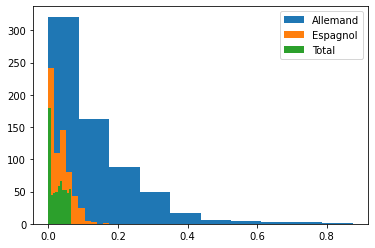

In [53]:
plt.hist(np.array(liste_all),label='Allemand')
plt.hist(np.array(liste_esp), label = 'Espagnol')
plt.hist(np.array(liste_tot), label = 'Total')
plt.legend(loc='upper right') 
plt.show()

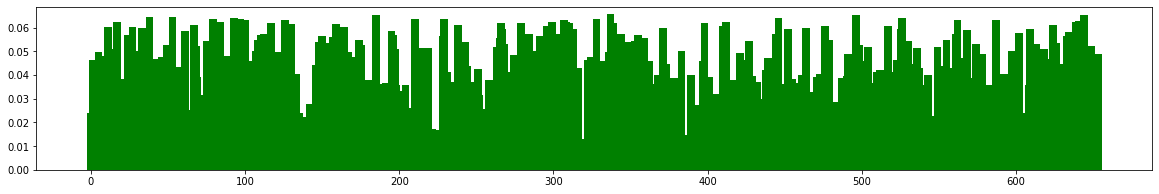

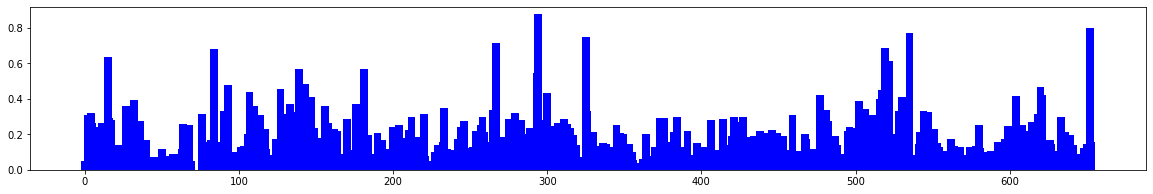

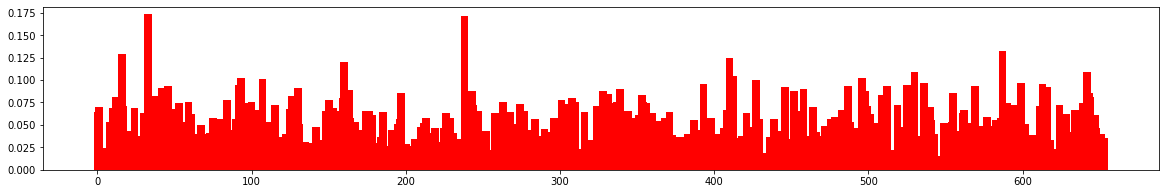

In [54]:
width = 5

indices = np.arange(len(liste_all))
fig = plt.figure(1, figsize=(20, 3))
plt.bar(indices, liste_tot, width=width, 
        color='green', label='Total')
plt.show()

fig = plt.figure(1, figsize=(20, 3))
plt.bar(indices, liste_all, width=width, 
        color='blue', label='Allemand')
plt.show()

fig = plt.figure(1, figsize=(20, 3))
plt.bar(indices, liste_esp, width=width, 
        color='red', label='Espagnol')
plt.show()

# Régressions sur les collèges aux taux de CSP+ plutôt constants

In [55]:
elevs = pd.concat([elev05,elev06,elev07,elev08,elev09,elev10,elev11,elev12,elev13,elev14,elev15,elev16,elev17,elev18],ignore_index = True)

In [56]:
elevs = elevs[['NUM_ETAB', 'csp+?', 'année','LV1', 'LV2','SEXE','MEFST6']]

## Calcul des résultats des collèges

On accède aux résulats des collèges 

In [57]:
results = pd.read_csv('/content/drive/MyDrive/PDSS/bases_paris_college/fr-en-dnb-par-etablissement.csv' , delimiter = ';')

In [58]:
results['formule_classement'] = (1/2)*(results['Admis']+results['Admis']-results['Admis sans mention'])/results['Presents']

In [59]:
results = results[results["Type d'etablissement"] == 'COLLEGE']
results = results[results["Libellé région"] == 'ILE-DE-FRANCE']

In [60]:
results_ = results[["Numero d'etablissement", 'Session',"formule_classement"]]

In [61]:
results.columns

Index(['Session', 'Numero d'etablissement', 'Type d'etablissement',
       'Patronyme', 'Secteur d'enseignement', 'Commune', 'Libellé commune',
       'Code département', 'Libellé département', 'Code académie',
       'Libellé académie', 'Code région', 'Libellé région', 'Inscrits',
       'Presents', 'Admis', 'Admis sans mention', 'Nombre_d_admis_Mention_AB',
       'Admis Mention bien', 'Admis Mention très bien', 'Taux de réussite',
       'formule_classement'],
      dtype='object')

In [62]:
results_par_etab = {}
for etab in list(results["Numero d'etablissement"].unique()) :
  results_par_etab[etab] = {}
  df = results_[results_["Numero d'etablissement"] == etab].reset_index()
  for i in range(0,len(df)) :
    results_par_etab[etab][df['Session'][i]] = df['formule_classement'][i]

In [63]:
results_par_etab # Dictionnaire des résultats au brevet par année

{'0750584C': {2006: 0.42934782608695654,
  2007: 0.4777777777777778,
  2008: 0.5775862068965517,
  2009: 0.5347222222222222,
  2010: 0.625,
  2011: 0.5844155844155844,
  2012: 0.6902173913043478,
  2013: 0.4631578947368421,
  2014: 0.6182795698924731,
  2015: 0.7079646017699115,
  2016: 0.6182795698924731,
  2017: 0.7239583333333334,
  2018: 0.7291666666666666,
  2019: 0.5904255319148937,
  2020: 0.7674418604651163},
 '0751563S': {2006: 0.6931818181818182,
  2007: 0.7611940298507462,
  2008: 0.8111111111111111,
  2009: 0.7777777777777778,
  2010: 0.8223140495867769,
  2011: 0.7071428571428572,
  2012: 0.7589928057553957,
  2013: 0.7482517482517482,
  2014: 0.6727941176470589,
  2015: 0.7175572519083969,
  2016: 0.7574626865671642,
  2017: 0.8090909090909091,
  2018: 0.6839622641509434,
  2019: 0.6727272727272727,
  2020: 0.7990654205607477},
 '0751791P': {2006: 0.7135678391959799,
  2007: 0.8005050505050505,
  2008: 0.8742690058479532,
  2009: 0.8435897435897436,
  2010: 0.890306122448

In [64]:
len(constants.keys())

671

In [65]:
elevs['sel3'] = elevs['NUM_ETAB'].apply(lambda x : 1 if x in list(constants.keys()) else 0)

In [66]:
elevs = elevs[elevs['sel3'] == 1][['NUM_ETAB','csp+?','année','LV1','LV2','SEXE','MEFST6']]

In [67]:
elevs.columns

Index(['NUM_ETAB', 'csp+?', 'année', 'LV1', 'LV2', 'SEXE', 'MEFST6'], dtype='object')

In [68]:
len(elevs)

2962789

## Régression pour l'année 2009

### Préparation finale des bases et ajout des dernières variables

In [69]:
elevs2009 = elevs[elevs['année'] == '2009'].reset_index()

In [70]:
len(elevs2009)

186049

In [71]:
elevs2009['MEFST6'].unique()

array([211500, 211600, 211100, 211200, 211400, 211900, 211700, 211800,
       243300])

In [72]:
elevs2009quatrieme = elevs2009[elevs2009['MEFST6'] == 211500].reset_index(drop = True)

In [73]:
len(elevs2009quatrieme)

86438

In [74]:
# 1 si allemand 0 si espagnol
elevs2009quatrieme['lv2'] = elevs2009quatrieme['LV2'].apply(lambda x : 1 if x == 'ALLEMAND' else 0)

In [75]:
X_train = elevs2009quatrieme.reset_index()

In [76]:
L = ['ESPAGNOL','ALLEMAND']
X_train['sel'] = X_train['LV2'].apply(lambda x : 1 if x in L else 0)

In [77]:
X_train = X_train[X_train['sel'] == 1].reset_index(drop = True)

In [78]:
X_train['année'].unique()

array(['2009'], dtype=object)

In [79]:
len(X_train)

77547

Préparation de la colonne : taux de csp+ l'année précédente

In [80]:
Lesp = []
for i in range(0, len(X_train)) : 
  etab = X_train['NUM_ETAB'][i]
  if etab in list(csp_langues.keys()) :
    if '2008' in list(csp_langues[etab]['ESPAGNOL'].keys()) :
      Lesp.append(csp_langues[etab]['ESPAGNOL']['2008'])
    else :
      Lesp.append(1000)
  else :
    Lesp.append(10000)

In [81]:
Lall = []
for i in range(0, len(X_train)) : 
  etab = X_train['NUM_ETAB'][i]
  if etab in list(csp_langues.keys()) :
    if '2008' in list(csp_langues[etab]['ALLEMAND'].keys()) :
      Lall.append(csp_langues[etab]['ALLEMAND']['2008'])
    else :
      Lall.append(1000)
  else :
    Lall.append(10000)

In [82]:
X_train['tauxcspespp'] = Lesp
X_train['tauxcspallp'] = Lall

In [83]:
X_train['sel4'] = X_train['tauxcspallp'].apply(lambda x : 1 if x < 2 else 0)
X_train['sel5'] = X_train['tauxcspespp'].apply(lambda x : 1 if x < 2 else 0)

In [84]:
X_train = X_train[X_train['sel4'] == 1].reset_index(drop = True)
X_train = X_train[X_train['sel5'] == 1].reset_index(drop = True)

In [85]:
R = []
for i in range(0, len(X_train)) :
  etab = X_train['NUM_ETAB'][i]
  R.append(results_par_etab[etab][2008])

In [86]:
X_train['Résultats brevets année précédente'] = R

In [87]:
s1 = set(list(X_train['NUM_ETAB'].unique()))
s2 = set(list(constants.keys()))

In [88]:
len(list(X_train['NUM_ETAB'].unique()))

621

In [89]:
print(len(s1&s2))

621


On rajoute aussi le taux global de CSP+ dans le collège l'année d'avant pour créer l'indice de dissimilarité.texte en italique

In [90]:
L = []
for i in range(0, len(X_train)) : 
  etab = X_train['NUM_ETAB'][i]
  L.append(csp_annees[etab]['2008'])

In [91]:
X_train['Taux de CSP+ dans le collège année précédente'] = L

Préparation de la régression

In [92]:
# Préparation des termes d'intéraction

X_train["Taux de csp+ en espagnol l'année précédente au choix * CSP+"] = X_train['tauxcspespp'] * X_train['csp+?']
X_train["Taux de csp+ en allemand l'année précédente au choix * CSP+"] = X_train['tauxcspallp'] * X_train['csp+?']
X_train['Résultat collège * CSP+'] = X_train['Résultats brevets année précédente'] * X_train['csp+?']
X_train["Dissimilarité"] = (X_train['tauxcspallp'] - X_train['Taux de CSP+ dans le collège année précédente'])
X_train["Dissimilarité * CSP+"] = X_train["Dissimilarité"] * X_train['csp+?']

In [93]:
X_train['année'].unique()

array(['2009'], dtype=object)

In [94]:
Xtrain_esp = X_train[X_train['lv2'] == 0]
Xtrain_all = X_train[X_train['lv2'] == 1]

In [95]:
len(Xtrain_all)

8590

In [96]:
Xtrain_all = Xtrain_all.sample(frac=5, replace=True, random_state=1)


In [97]:
X_train = pd.concat([Xtrain_all,Xtrain_esp], ignore_index=True)

Cette étape était nécessaire pour égaliser les données allemands et espagnols dans la base afin d'éviter une prédiction chaotique

### Régression 2009

In [98]:
y_train = X_train['lv2']
x_train = X_train[['Résultat collège * CSP+',"Dissimilarité * CSP+","Dissimilarité",'tauxcspallp','csp+?','SEXE',"Résultats brevets année précédente"]]

In [99]:
# modèle d'apprentissage sur l'année 2009 (élèves qui rentrent en 4e cette année et leur choix de langue)

x_train = sm.add_constant(x_train)
model = sm.Logit(y_train.astype(float), x_train.astype(float))
results = model.fit()
print(results.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.663182
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                    lv2   No. Observations:               107979
Model:                          Logit   Df Residuals:                   107971
Method:                           MLE   Df Model:                            7
Date:                Wed, 11 May 2022   Pseudo R-squ.:                 0.01326
Time:                        08:31:22   Log-Likelihood:                -71610.
converged:                       True   LL-Null:                       -72572.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 -1.2166      0.052    

A partir de notre modèle de régression l'idée était de savoir si l'on pouvait prédir les langues choisies pour des années différentes. Nous avons choisi une année avant la réforme, 2014, et une autre après la réforme, 2017.

## Prédiction sur les élèves de 4e qui entrent en 2014 (avant la réforme)

### Préparation de la base 2014

In [100]:
# Prédiction sur les élèves de 4e qui entrent en 2014 

elevs2014 = elevs[elevs['année'] == '2014']

In [101]:
elevs2014quatrieme = elevs2014[elevs2014['MEFST6'] == 211500]

In [102]:
elevs2014quatrieme['lv2'] = elevs2014quatrieme['LV2'].apply(lambda x : 1 if x == 'ALLEMAND' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [103]:
X_test = elevs2014quatrieme.reset_index()

In [104]:
L = ['ESPAGNOL','ALLEMAND']
X_test['sel'] = X_test['LV2'].apply(lambda x : 1 if x in L else 0)

In [105]:
X_test = X_test[X_test['sel'] == 1].reset_index()

In [106]:
Lesp = []
for i in range(0, len(X_test)) : 
  etab = X_test['NUM_ETAB'][i]
  if etab in list(csp_langues.keys()) :
    if '2013' in list(csp_langues[etab]['ESPAGNOL'].keys()) :
      Lesp.append(csp_langues[etab]['ESPAGNOL']['2013'])
    else :
      Lesp.append(1000)
  else :
    Lesp.append(10000)

In [107]:
Lall = []
for i in range(0, len(X_test)) : 
  etab = X_test['NUM_ETAB'][i]
  if etab in list(csp_langues.keys()) :
    if '2008' in list(csp_langues[etab]['ALLEMAND'].keys()) :
      Lall.append(csp_langues[etab]['ALLEMAND']['2008'])
    else :
      Lall.append(1000)
  else :
    Lall.append(10000)

In [108]:
X_test['tauxcspespp'] = Lesp
X_test['tauxcspallp'] = Lall

In [109]:
X_test['sel4'] = X_test['tauxcspallp'].apply(lambda x : 1 if x < 2 else 0)
X_test['sel5'] = X_test['tauxcspespp'].apply(lambda x : 1 if x < 2 else 0)

In [110]:
X_test = X_test[X_test['sel4'] == 1].reset_index(drop = True)
X_test = X_test[X_test['sel5'] == 1].reset_index(drop = True)

In [111]:
R = []
for i in range(0, len(X_test)) :
  etab = X_test['NUM_ETAB'][i]
  R.append(results_par_etab[etab][2013])

In [112]:
X_test['Résultats brevets année précédente'] = R

In [113]:
s1 = set(list(X_test['NUM_ETAB'].unique()))
s2 = set(list(constants.keys()))
len(list(X_test['NUM_ETAB'].unique())),len(s1&s2)

(621, 621)

In [114]:
L = []
for i in range(0, len(X_test)) : 
  etab = X_test['NUM_ETAB'][i]
  L.append(csp_annees[etab]['2013'])

In [115]:
X_test['Taux de CSP+ dans le collège année précédente'] = L

In [116]:
# Préparation des termes d'intéraction

X_test["Taux de csp+ en espagnol l'année précédente au choix * CSP+"] = X_test['tauxcspespp'] * X_test['csp+?']
X_test["Taux de csp+ en allemand l'année précédente au choix * CSP+"] = X_test['tauxcspallp'] * X_test['csp+?']
X_test['Résultat collège * CSP+'] = X_test['Résultats brevets année précédente'] * X_test['csp+?']
X_test["Dissimilarité"] = (X_test['tauxcspallp'] - X_test['Taux de CSP+ dans le collège année précédente']) + (X_test['tauxcspespp'] - X_test['Taux de CSP+ dans le collège année précédente'])
X_test["Dissimilarité * CSP+"] = X_test["Dissimilarité"] * X_test['csp+?']

In [117]:
y_test = X_test['lv2']
x_test = X_test[['Résultat collège * CSP+',"Dissimilarité * CSP+","Dissimilarité",'tauxcspallp','csp+?','SEXE',"Résultats brevets année précédente"]]

In [118]:
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [119]:
X_test['année'].unique()

array(['2014'], dtype=object)

In [120]:
ynewpred = results.predict(x_test)  # predict out of sample
prediction = list(map(round, ynewpred))

### Résultats prédiction 2014

In [121]:
from sklearn.metrics import (ConfusionMatrixDisplay, f1_score)
import matplotlib.pyplot as plt

Confusion Matrix : 



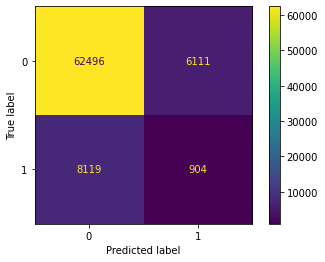

F1 score =  0.11273226088040904


In [122]:
print("Confusion Matrix : \n")
ConfusionMatrixDisplay.from_predictions(y_test, prediction)

plt.show()
print('F1 score = ', f1_score(y_test, prediction))

## Prédiction après la réforme pour l'année 2017

In [123]:
# Prédiction sur les élèves de 4e qui entrent en 2014 

elevs2017 = elevs[elevs['année'] == '2017']

In [124]:
elevs2017quatrieme = elevs2017[elevs2017['MEFST6'] == 211500]

In [125]:
elevs2017quatrieme['lv2'] = elevs2017quatrieme['LV2'].apply(lambda x : 1 if x == 'ALLEMAND' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
X_test = elevs2017quatrieme.reset_index()

In [127]:
L = ['ESPAGNOL','ALLEMAND']
X_test['sel'] = X_test['LV2'].apply(lambda x : 1 if x in L else 0)

In [128]:
X_test = X_test[X_test['sel'] == 1].reset_index()

In [129]:
Lesp = []
for i in range(0, len(X_test)) : 
  etab = X_test['NUM_ETAB'][i]
  if etab in list(csp_langues.keys()) :
    if '2016' in list(csp_langues[etab]['ESPAGNOL'].keys()) :
      Lesp.append(csp_langues[etab]['ESPAGNOL']['2016'])
    else :
      Lesp.append(1000)
  else :
    Lesp.append(10000)

In [130]:
Lall = []
for i in range(0, len(X_test)) : 
  etab = X_test['NUM_ETAB'][i]
  if etab in list(csp_langues.keys()) :
    if '2016' in list(csp_langues[etab]['ALLEMAND'].keys()) :
      Lall.append(csp_langues[etab]['ALLEMAND']['2016'])
    else :
      Lall.append(1000)
  else :
    Lall.append(10000)

In [131]:
X_test['tauxcspespp'] = Lesp
X_test['tauxcspallp'] = Lall

In [132]:
X_test['sel4'] = X_test['tauxcspallp'].apply(lambda x : 1 if x < 2 else 0)
X_test['sel5'] = X_test['tauxcspespp'].apply(lambda x : 1 if x < 2 else 0)

In [133]:
X_test = X_test[X_test['sel4'] == 1].reset_index(drop = True)
X_test = X_test[X_test['sel5'] == 1].reset_index(drop = True)

In [134]:
R = []
for i in range(0, len(X_test)) :
  etab = X_test['NUM_ETAB'][i]
  R.append(results_par_etab[etab][2016])

In [135]:
X_test['Résultats brevets année précédente'] = R

In [140]:
s1 = set(list(X_test['NUM_ETAB'].unique()))
s2 = set(list(constants.keys()))
len(list(X_test['NUM_ETAB'].unique())),len(s1&s2)

(569, 569)

In [141]:
L = []
for i in range(0, len(X_test)) : 
  etab = X_test['NUM_ETAB'][i]
  L.append(csp_annees[etab]['2016'])

In [142]:
X_test['Taux de CSP+ dans le collège année précédente'] = L

In [143]:
# Préparation des termes d'intéraction

X_test["Taux de csp+ en espagnol l'année précédente au choix * CSP+"] = X_test['tauxcspespp'] * X_test['csp+?']
X_test["Taux de csp+ en allemand l'année précédente au choix * CSP+"] = X_test['tauxcspallp'] * X_test['csp+?']
X_test['Résultat collège * CSP+'] = X_test['Résultats brevets année précédente'] * X_test['csp+?']
X_test["Dissimilarité"] = (X_test['tauxcspallp'] - X_test['Taux de CSP+ dans le collège année précédente']) + (X_test['tauxcspespp'] - X_test['Taux de CSP+ dans le collège année précédente'])
X_test["Dissimilarité * CSP+"] = X_test["Dissimilarité"] * X_test['csp+?']

In [148]:
y_test = X_test['lv2']
x_test = X_test[['Résultat collège * CSP+',"Dissimilarité * CSP+","Dissimilarité",'tauxcspallp','csp+?','SEXE',"Résultats brevets année précédente"]]

In [149]:
x_test = sm.add_constant(x_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [150]:
X_test['année'].unique()

array(['2017'], dtype=object)

In [151]:
ynewpred = results.predict(x_test)  # predict out of sample
prediction = list(map(round, ynewpred))

In [ ]:
from sklearn.metrics import (confusion_matrix, f1_score)

Confusion Matrix : 



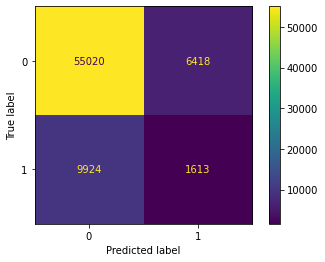

F1 score =  0.1648609975470155


In [153]:
print("Confusion Matrix : \n")
ConfusionMatrixDisplay.from_predictions(y_test, prediction)

plt.show()
print('F1 score = ', f1_score(y_test, prediction))

Les résultats obtenus ne sont pas satisfaisants mais marquent le fait qu'il nous a manqués des variables explicatives déterminantes du choix d'une langue.